In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Salary_Dataset_with_Extra_Features.csv")

In [3]:
df.sample(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
11998,4.3,yellow.ai,Software Development Engineer - Intern,120000,2,Bangalore,Intern,SDE
8903,4.2,Udemy,Java Developer,300000,1,Chennai,Full Time,Java
10766,4.0,Mind(India),Mobile Applications Developer,1056000,1,Bangalore,Full Time,Mobile
10931,3.9,Brisa Technologies,Python Developer - Intern,132000,2,Bangalore,Intern,Python
15252,4.1,Fresher,Software Development Engineer (SDE) - Intern,400000,1,Hyderabad,Intern,SDE


In [4]:
df.shape

(22770, 8)

In [5]:
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [6]:
df.dtypes

Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object

In [7]:
df['Company Name'].value_counts()

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
                                 ... 
Talent Anywhere                     1
WisdmLabs                           1
Softdel                             1
Dentsu                              1
Nextgen Innovation Labs             1
Name: Company Name, Length: 11261, dtype: int64

Data cleaning

In [8]:
df['Company Name']=df['Company Name'].str.replace('Tata Consultancy Services','TCS')
df['Company Name']=df['Company Name'].apply(lambda x:'Amazon' if "Amazon" in x else x)
df['Company Name']=df['Company Name'].apply(lambda x:'Infosys' if "Infosys" in x else x)
df['Company Name']=df['Company Name'].apply(lambda x:'HCL' if "HCL" in x else x)
df['Company Name']=df['Company Name'].apply(lambda x:'IBM' if "IBM" in x else x)
df['Company Name']=df['Company Name'].apply(lambda x:'Cognizant' if "Cognizant" in x else x)
df['Company Name']=df['Company Name'].apply(lambda x:'Google' if "Google" in x else x)
df['Company Name']=df['Company Name'].apply(lambda x:'Accenture' if "Accenture" in x else x)

In [9]:
#now will remove the outliers
df=df[df['Company Name']!="(no)name"]
df=df[~df['Company Name'].isin(['-','....','Fresher'])]

In [10]:
#removing companies names that contain only number
fdi=[]
for name in df['Company Name']:
    if name.isnumeric():
        fdi.append(name)
        
fdi=np.unique(fdi)

In [11]:
fdi

array(['10', '17544', '1985', '2018', '660000', '700'], dtype='<U6')

In [12]:
df=df[~df['Company Name'].isin(fdi)]

UNIVARIATE ANALYSIS

In [13]:
de=df['Company Name'].value_counts()
df1 = de.reset_index().head(11)
df1.columns = ['Company Name', 'Count']

df1

,Company Name,Count
0,TCS,313
1,Infosys,208
2,Amazon,203
3,Cognizant,159
4,Accenture,152
5,IBM,135
6,HCL,132
7,Wipro,122
8,Capgemini,101
9,Microsoft,96


In [14]:
len(df['Company Name'].unique())

11208

In [15]:
len(df['Job Title'].unique())

1076

In [105]:
jb=df['Job Title'].value_counts()
jb1=jb.reset_index().head()
jb1.columns=['Job Title','Count']
jb1

,Job Title,Count
0,Software Development Engineer,2343
1,Android Developer,2027
2,Software Development Engineer (SDE),1604
3,Front End Developer,1404
4,Test Engineer,1308


In [17]:
df['Location'].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

In [18]:
l=df['Location'].value_counts()
l1=l.reset_index()
l1.columns=['Location','Count']
l1

,Location,Count
0,Bangalore,8227
1,Hyderabad,4431
2,New Delhi,4166
3,Chennai,2437
4,Pune,2127
5,Mumbai,746
6,Kolkata,177
7,Madhya Pradesh,155
8,Kerala,107
9,Jaipur,80


In [19]:
f1 = []
f2 = []

# Iterate over the relevant columns
for i in ['Location', 'Count']:
    if i == 'Location':
        f1.extend(l1[i].values)
    elif i == 'Count':
        f2.extend(l1[i].values)


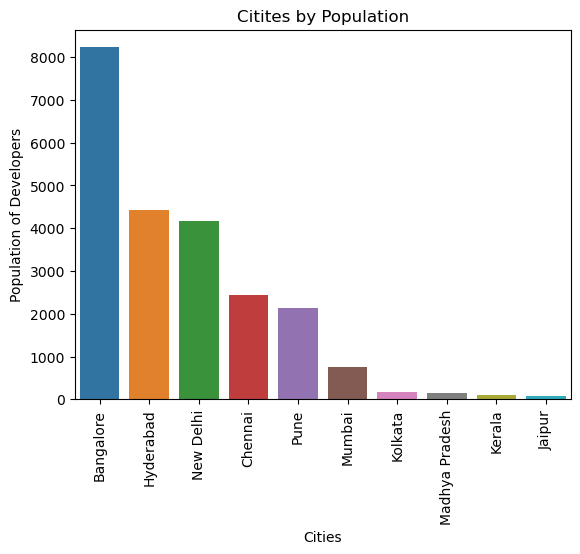

In [20]:
sns.barplot(x=f1,y=f2)
plt.xlabel('Cities')
plt.ylabel('Population of Developers')
plt.title('Citites by Population')
plt.xticks(rotation='vertical')
plt.show()

In [21]:
df['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [22]:
jr=df['Job Roles'].value_counts()
jr1=jr.reset_index()
jr1.columns=['Job Roles','Count']
jr1

,Job Roles,Count
0,SDE,8151
1,Android,2942
2,Frontend,2149
3,Java,1834
4,Testing,1734
5,IOS,1631
6,Backend,1190
7,Web,993
8,Python,922
9,Database,863


In [23]:
D=[]
D1=[]
for i in ['Job Roles','Count']:
    if i=='Job Roles':
        D.extend(jr1[i].values)
    if i=='Count':
        D1.extend(jr1[i].values)

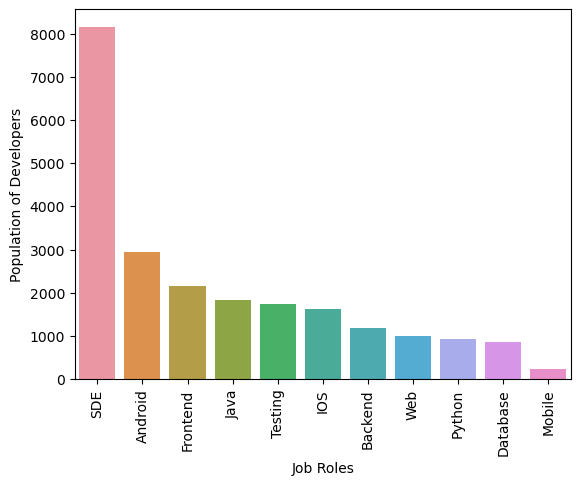

In [24]:
sns.barplot(x=D,y=D1)
plt.xlabel('Job Roles')
plt.ylabel('Population of Developers')
plt.xticks(rotation='vertical')
plt.show()

In [25]:
salary = df['Salary'].describe()
salary_df = salary.reset_index()
salary_df

,index,Salary
0,count,2.265300e+04
1,mean,6.968073e+05
2,std,8.860057e+05
3,min,2.112000e+03
4,25%,3.000000e+05
5,50%,5.000000e+05
6,75%,9.000000e+05
7,max,9.000000e+07


C:\Users\indra\AppData\Local\Temp\ipykernel_4300\2614900338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'],kde=True)


<Axes: xlabel='Salary', ylabel='Density'>

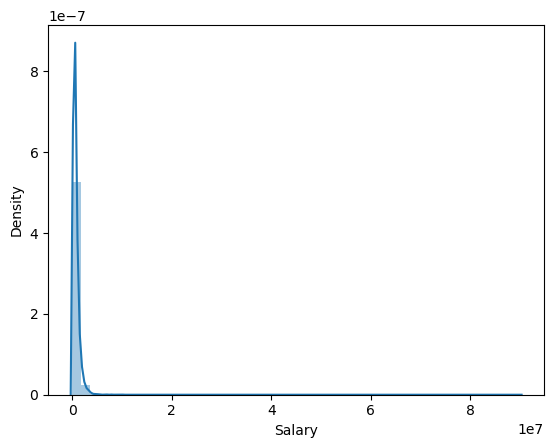

In [26]:
sns.distplot(df['Salary'],kde=True)

As the Mean>Median,this shows that it is a Right-Skewed Disturbution.This is not a very unexpected result beacuse the median salary of a very large pouplation is most likely toward the lower side.

In [27]:
from scipy.stats import skew
print("Skewness is:",skew(df['Salary']))

Skewness is: 46.77595029608785


So the Skewness>>1,this states that it's a right skewed distrubution.
Here we can use many transformation such as log transformation,Power transformation etc.
Here we will use Log transformation

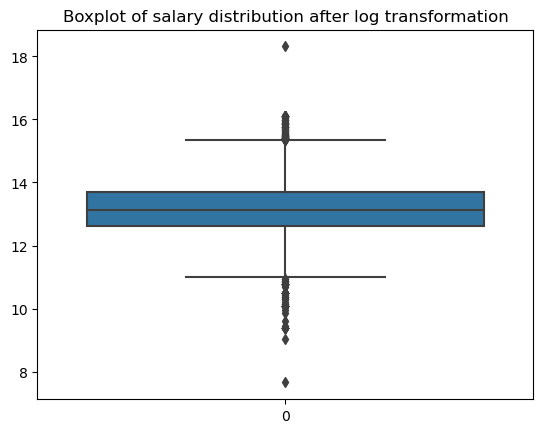

In [28]:
import warnings
warnings.simplefilter(action='ignore')
sns.boxplot(np.log(df['Salary']))
plt.title('Boxplot of salary distribution after log transformation')
plt.show()

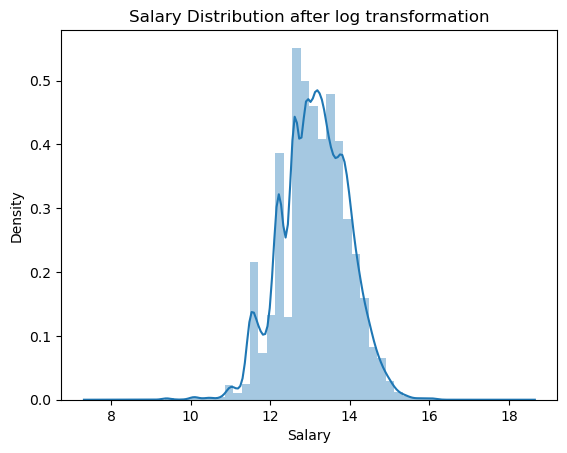

In [29]:
sns.distplot(np.log(df['Salary']),kde=True)
plt.title("Salary Distribution after log transformation")
plt.show()

I guess this distribution is very close to normal and also the skewness is also removed after the log transformation.Thus we can use this plot for Hypothesis testing.

In [30]:

rating_stats = df['Rating'].describe()

# Convert to DataFrame
rating_df = pd.DataFrame(rating_stats)
rating_df

,Rating
count,22653.000000
mean,3.917124
std,0.520700
min,1.000000
25%,3.700000
50%,3.900000
75%,4.200000
max,5.000000


In [31]:
print("Skewness is :", skew(df['Rating']))

Skewness is : -1.0080950998038918


so it is a negative-skewed distribution 

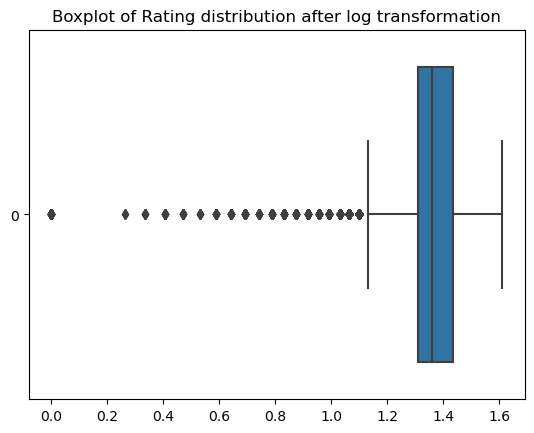

In [32]:
sns.boxplot(np.log(df['Rating']),orient='h')
plt.title('Boxplot of Rating distribution after log transformation')
plt.show()

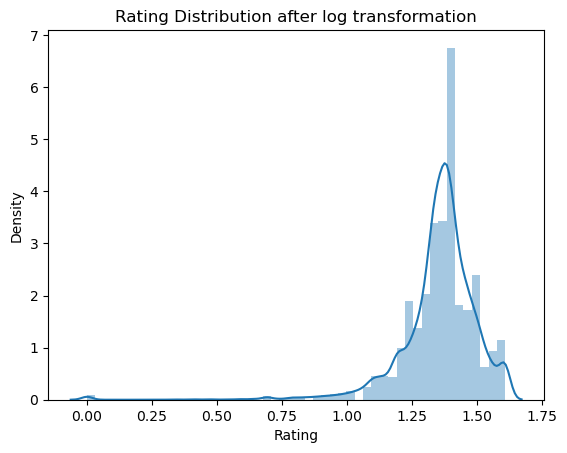

In [33]:
sns.distplot(np.log(df['Rating']),kde=True)
plt.title("Rating Distribution after log transformation")
plt.show()

Thus,the distribution is almost Normal if we ignore the left tail,which have fraction of the data.Thus,it will follow the assumptions of Normal distribution and can be used for 'Hypothesis testing'.

In [34]:
df['Salaries Reported'].unique()

array([  3,   2,   1,   5,   4,   6,   8,  11,   9,  30,  19,  35,  17,
         7,  43,  24,  21,  15,  14,  13,  12,  10,  26,  29,  18,  16,
        84,  38,  36,  20, 291,  23, 353,  40,  60, 162,  68,  33,  45,
        73, 135, 100,  22,  75,  37,  34,  65, 115,  28, 186,  41,  31,
       188, 149,  77,  76,  52,  39,  83,  25, 361,  42, 280,  74,  44,
       331,  70,  50,  48, 263, 116, 106, 103,  98,  91,  80,  71,  64,
        51,  46,  32,  27], dtype=int64)

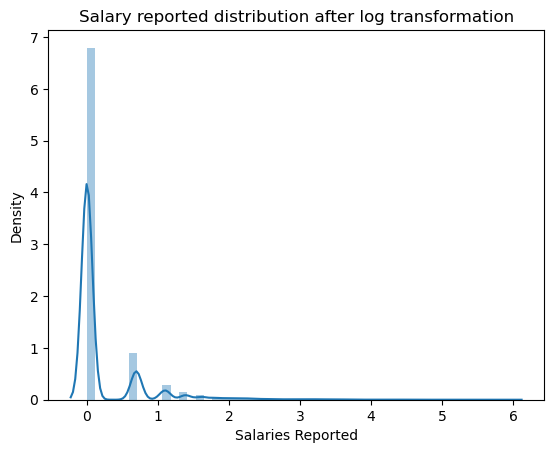

In [35]:
sns.distplot(np.log(df['Salaries Reported']),kde=True)
plt.title('Salary reported distribution after log transformation')
plt.show()

This is nothing close to normal we can't use it for hypothesis testing.

 Employment Status

In [36]:
employment=df['Employment Status'].value_counts()
pd.DataFrame(employment)

,Employment Status
Full Time,19983
Intern,2090
Contractor,548
Trainee,32


In [37]:
f00=[]
f01=[]
for i in employment.index:
    f00.append(i)
    f01.append(employment[i])


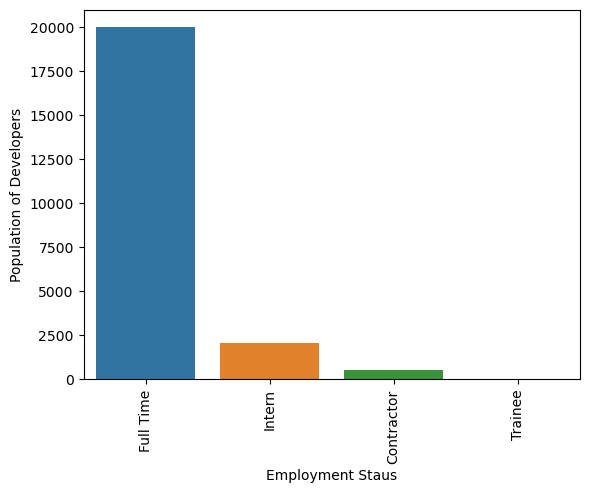

In [38]:
sns.barplot(x=f00,y=f01)
plt.xlabel('Employment Staus')
plt.ylabel('Population of Developers')
plt.xticks(rotation='vertical')
plt.show()

Here we can conclude that most of the employees here are Full time and others are interns.

# HYPOTHESIS

Below are the list of hypothesis that we have built,and lets prove them one-by-one.
## 1st Hypothesis: Most of the SDE's live in Bangalore
## 2nd Hypothesis:Employees using Java in job roles have higher salary than Python.
## 3rd Hypotheis:Microsoft developers living in hyderabad get more salary than Bangalore.
    
As,we saw in the previous section that continuos features of the data is skewed.Thus,we have do a transformations to make them normal.
This is required for hypothesis testing,we assume that our distrubution is Normal.Thus,will do a Log-Transormations to make it normal 
and use this data for further analysis.

Statement:Most of the SDE live in Banglore

In [39]:
sde=df[df['Job Roles']=='SDE']


In [40]:
loc=sde['Location'].value_counts()
ls1=pd.DataFrame(loc)
ls1=ls1.rename(columns={'Location':'Counts'})
ls1

,Counts
Bangalore,1981
New Delhi,1691
Hyderabad,1479
Pune,1070
Mumbai,744
Chennai,668
Kolkata,176
Madhya Pradesh,155
Kerala,107
Jaipur,80


In [41]:
D_e=[]
D_F=[]
for key, value in ls1.iterrows():
    D_e.append(key)
    D_F.append(value['Counts'])


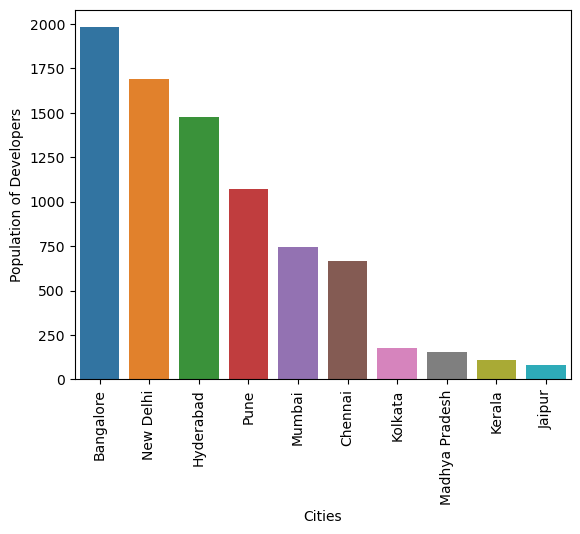

In [42]:
sns.barplot(x=D_e,y=D_F)
plt.xticks(rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Population of Developers')
plt.show()

## It appears that software development engineers (SDEs) have a strong preference for Bangalore, which may be likened to how Kota is favored by students preparing for competitive exams. Given that the counts of developers do not form a standard statistical distribution, we are unable to perform hypothesis testing. Therefore, we rely on the insights derived from the bar plot.

# 2nd Hypothesis

## Statement:The java developers have higher salary as compared to python 

In [43]:
DF=df.copy()
DF['Salary']=np.log(DF['Salary'])

D12=DF[DF['Job Roles'].isin(['Java','Python'])]



In [44]:
r1=D12[D12['Job Roles']=="Java"].Salary.describe()
pd.DataFrame(r1)

,Salary
count,1834.000000
mean,12.942229
std,0.754228
min,9.041685
25%,12.448814
50%,12.899220
75%,13.458836
max,16.118096


In [45]:
r2=D12[D12['Job Roles']=="Python"].Salary.describe()
pd.DataFrame(r2)

,Salary
count,922.000000
mean,12.851564
std,0.712488
min,10.085809
25%,12.388394
50%,12.899220
75%,13.304685
max,15.747032


Two-Sampled Z-test

Null Hypothesis (Ho): Java developers have similar salaries compared to Python developers.

Alternative Hypothesis (Ha): Java developers have different salaries compared to Python developers.
alpha=0.05

Aim:Here we have 2 Samples,so to compare their mean,we will do a '2 sample Z-test'.As the sample is large,so 'Z-test' will be good
test static.IF we get P value lower than alpha,then the effect is real and the result is statistically significant.    

In [46]:
numbers=np.array([1834,922])
salarysum=np.array([12.94,12.85])
from statsmodels.stats.proportion import proportions_ztest

In [47]:
Z_value,P_value=proportions_ztest(salarysum,numbers)

print('Z-score=',Z_value)
print('P-value=',P_value)

Z-score= -1.7703645574909819
P-value= 0.07666643000664959


## The p-value is about 0.076>alpha,so we can't reject the null hypothesis.That means the developers using java have similar salary as that of python

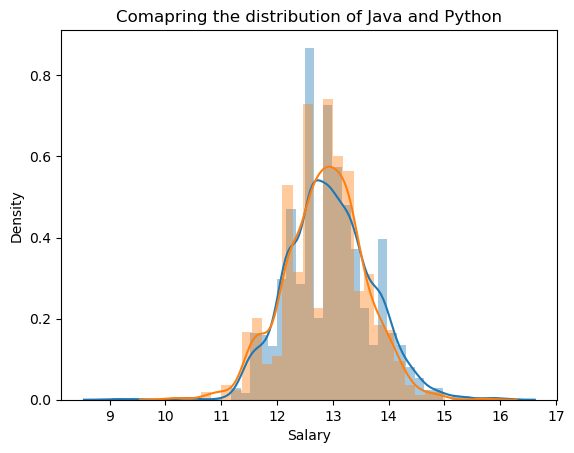

In [48]:
sns.distplot(D12[D12['Job Roles']=='Java'].Salary,label='Java')
sns.distplot(D12[D12['Job Roles']=='Python'].Salary,label='Python')
plt.title("Comapring the distribution of Java and Python")
plt.show()

## Result:
### Based on the two-sample z-test, we accept the null hypothesis, indicating that Java and Python developers have similar salaries (thank goodness). The higher number of individuals in Java development supports this finding.

# 3rd Hypothesis

## Statement:Microsoft developers living in hyderabad get more salary than Bangalore

Two-Sample Z-Test

Null Hypothesis (Ho): Employees working in Hyderabad are paid equally to those in Bangalore.

Alternative Hypothesis (Ha): Microsoft employees working in Hyderabad are paid differently than those in Bangalore.

Alpha: 0.05

Aim: Here, we will perform a two-sample z-test to verify our hypothesis. Typically, we use the z-test when
n>30 and the population standard deviation is known.

In [49]:
D13=DF[DF['Location'].isin(['Bangalore','Hyderabad'])]
D33=D13[D13['Company Name']=="Microsoft"]
x11=D33[D33['Location']=='Bangalore'].Salary
x12=D33[D33['Location']=='Hyderabad'].Salary

In [50]:
hyd=x12.describe()
hyd_stats=pd.DataFrame(hyd)
hyd_stats.rename(columns={'Salary': 'Hyderabad(Salary)'})

,Hyderabad(Salary)
count,47.000000
mean,13.930937
std,1.078638
min,9.392662
25%,13.570704
50%,14.151983
75%,14.603968
max,15.201805


In [51]:
bng=x11.describe()
bng_stats=pd.DataFrame(bng)
bng_stats.rename(columns={'Salary': 'Bangalore(Salary)'})

,Bangalore(Salary)
count,20.000000
mean,13.911496
std,0.778606
min,11.512925
25%,13.777073
50%,13.994348
75%,14.353498
max,15.009433


In [52]:
nods=np.array([47,20])
total_salary_mean=([13.930937,13.911496])
Z_value,P_value=proportions_ztest(total_salary_mean,nods)
print('Zscore:', Z_value)
print('Pvalue:', P_value)

Zscore: -3.0338900083814746
Pvalue: 0.0024142243307232326


So,Pvalue<alpha ,it suggests that salaries is not similar that means we will reject the null hypothesis.But for the sake of convinince
we will try t test also


In [53]:
from scipy.stats import ttest_ind
z_score,p_value=ttest_ind(total_salary_mean,nods)
print('z_score for ttest:', z_score)
print('p_value for ttest:' ,p_value)

z_score for ttest: -1.450279883308087
p_value for ttest: 0.28404691204022814


The p-value for 'Z-test' is less than alpha,that means the result has 'Statistical significance'.So,We have enough evidence to
reject the null hypothesis.That means the mean salary of Microsoft employee for the Hyderabad and Bangalore is different.But,the
ttest gives the opposite result,thus lets compare it with actual data.

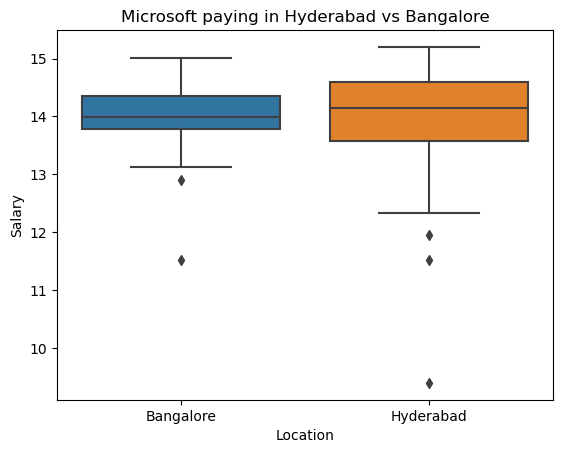

In [54]:
sns.boxplot(x='Location',y='Salary',data=D33)
plt.title('Microsoft paying in Hyderabad vs Bangalore')
plt.show()

Based on the boxplot analysis, we conclude that the median salary in Hyderabad is higher than that in Bangalore. Therefore, the result predicted by the t-test may not accurately reflect the salary comparison between these two locations.

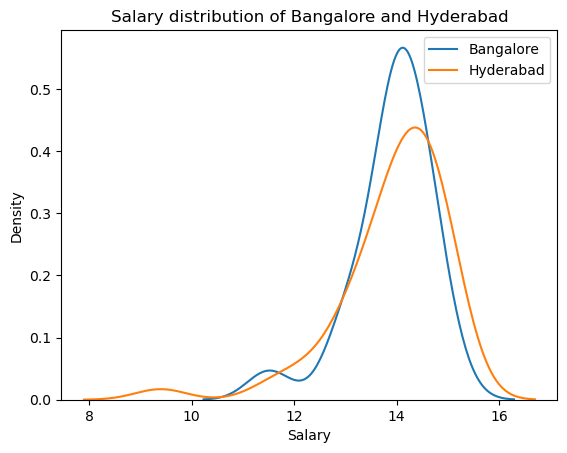

In [55]:
sns.distplot(x11,label='Bangalore',hist=False)
sns.distplot(x12,label='Hyderabad',hist=False)
plt.title('Salary distribution of Bangalore and Hyderabad')
plt.legend()
plt.show()

Result: We accept the null hypothesis that Microsoft employees living in Hyderabad are paid more than those in Bangalore. Additionally, when n>30, the z-test is typically preferred.

# Pearson's  Correlation Coefficient Matrix

Here,in this dataframe we have only three features that are continuous namely:Salary,Rating and Salary reported.
Lets find out the correlation coefficient matrices of three such combinations.

In [56]:
df[['Rating',"Salary",'Salaries Reported']].corr().style.background_gradient()

,Rating,Salary,Salaries Reported
Rating,1.000000,0.026201,-0.011708
Salary,0.026201,1.000000,0.004632
Salaries Reported,-0.011708,0.004632,1.000000


1)Salary vs Rating

In [57]:
np.corrcoef(np.log(df['Salary']),(np.log(df['Rating'])))

array([[1.        , 0.04779641],
       [0.04779641, 1.        ]])

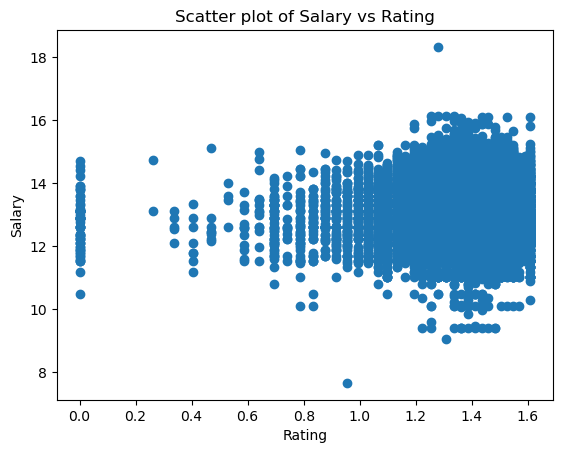

In [58]:
plt.scatter(np.log(df['Rating']),(np.log(df['Salary'])))

plt.xlabel('Rating')
plt.ylabel('Salary')
plt.title('Scatter plot of Salary vs Rating')
plt.show()

# Conclusion:
## As,correlation coefficient is very low,thus it does not show any linear relationship.For,some region its linear up and others its linear down.In some regions it shows how the salary increases by keeping the rating constant and vice versa.Thus,in total there is no significant correlation

In [59]:
#2)Salary vs Salaries Reported
np.corrcoef(np.log(df['Salary']),np.log(df['Salaries Reported']))

array([[ 1.        , -0.01852447],
       [-0.01852447,  1.        ]])

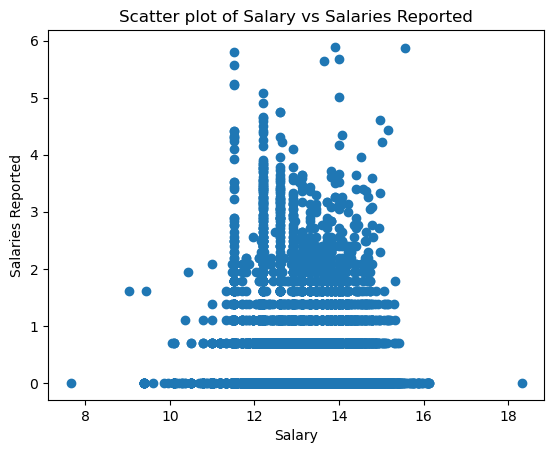

In [60]:
plt.scatter(np.log(df['Salary']),(np.log(df['Salaries Reported'])))

plt.xlabel('Salary')
plt.ylabel('Salaries Reported')
plt.title('Scatter plot of Salary vs Salaries Reported')
plt.show()

# Conclusion 
## Here the Correlation Coefficient is negative but very small,so there is no linear behaviour between them.We can see at constant Salaries reported salaries increases and vice versa.This also supports the idea that they dont have much correlation.

In [61]:
#3)Rating vs Salaries Reported
np.corrcoef(np.log(df['Rating']),np.log(df['Salaries Reported']))

array([[1.        , 0.02091221],
       [0.02091221, 1.        ]])

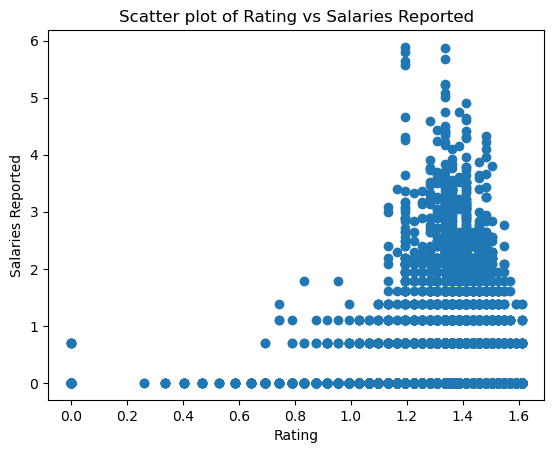

In [62]:
plt.scatter(np.log(df['Rating']),(np.log(df['Salaries Reported'])))

plt.xlabel('Rating')
plt.ylabel('Salaries Reported')
plt.title('Scatter plot of Rating vs Salaries Reported')
plt.show()

# Conclusion 
## Here,the correlation is positive but very small,thus no linear trend is expected.This also reflected in the scatter plot,as when 'Rating' increases,'Salaries Reported' remains same and vice versa.

# Location

In [63]:
loc1=df[df['Location'].isin(['Bangalore'])].Salary.describe()
pd.DataFrame(loc1)

,Salary
count,8.227000e+03
mean,7.365826e+05
std,6.846221e+05
min,2.112000e+03
25%,3.000000e+05
50%,5.000000e+05
75%,1.000000e+06
max,1.000000e+07


In [64]:
loc2=df[df['Location'].isin(['Mumbai'])].Salary.describe()
pd.DataFrame(loc2)

,Salary
count,7.460000e+02
mean,9.616945e+05
std,8.456556e+05
min,1.200000e+04
25%,4.000000e+05
50%,7.040000e+05
75%,1.200000e+06
max,9.800000e+06


In [65]:
loc3=df[df['Location'].isin(['Chennai'])].Salary.describe()
pd.DataFrame(loc3)

,Salary
count,2.437000e+03
mean,5.871857e+05
std,5.450216e+05
min,1.200000e+04
25%,2.520000e+05
50%,4.000000e+05
75%,7.000000e+05
max,1.000000e+07


In [66]:
loc4=df[df['Location'].isin(['Jaipur'])].Salary.describe()
pd.DataFrame(loc4)

,Salary
count,8.000000e+01
mean,6.347500e+05
std,4.758409e+05
min,3.600000e+04
25%,3.000000e+05
50%,5.000000e+05
75%,8.250000e+05
max,2.500000e+06


# Region wise insights:

## 1.Most of the developers live in bangalore and with median salary 5 LPA.
## 2.Mumbai is the city with the largest median salary of 7 LPA.
## 3.Jaipur is the place where the least developers live with the medain of 5 LPA.
## 4.Chennai is the place with lowest median salary of 4 LPA.

# Job Roles

In [67]:
job1=df[df['Job Roles'].isin(['SDE'])].Salary.describe()
pd.DataFrame(job1)

,Salary
count,8.151000e+03
mean,8.551023e+05
std,1.234722e+06
min,1.200000e+04
25%,3.870000e+05
50%,6.720000e+05
75%,1.100000e+06
max,9.000000e+07


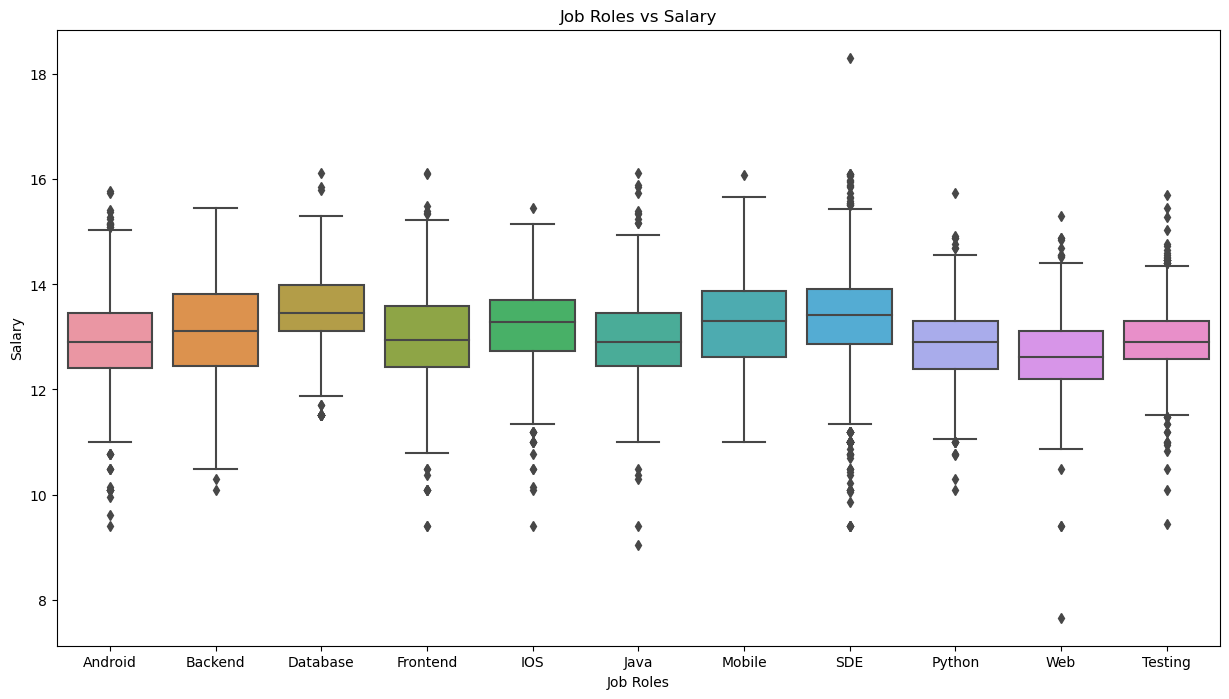

In [68]:
plt.rcParams['figure.figsize'] = [15, 8]  
sns.boxplot(x='Job Roles', y='Salary', data=DF)
plt.title('Job Roles vs Salary')
plt.show()

In [69]:
job2=df[df['Job Roles'].isin(['Database'])].Salary.describe()
pd.DataFrame(job2)

,Salary
count,8.630000e+02
mean,9.596468e+05
std,8.158439e+05
min,1.000000e+05
25%,5.000000e+05
50%,7.000000e+05
75%,1.200000e+06
max,1.000000e+07


In [70]:
job3=df[df['Job Roles'].isin(['Backend'])].Salary.describe()
pd.DataFrame(job3)

,Salary
count,1.190000e+03
mean,7.494241e+05
std,7.286335e+05
min,2.400000e+04
25%,2.550000e+05
50%,5.000000e+05
75%,1.000000e+06
max,5.200000e+06


In [71]:
job4=df[df['Job Roles'].isin(['Web'])].Salary.describe()
pd.DataFrame(job4)

,Salary
count,9.930000e+02
mean,4.164758e+05
std,3.598394e+05
min,2.112000e+03
25%,2.000000e+05
50%,3.000000e+05
75%,5.000000e+05
max,4.400000e+06


In [72]:
job5=df[df['Job Roles'].isin(['Python'])].Salary.describe()
pd.DataFrame(job5)

,Salary
count,9.220000e+02
mean,4.909930e+05
std,4.274532e+05
min,2.400000e+04
25%,2.400000e+05
50%,4.000000e+05
75%,6.000000e+05
max,6.900000e+06


# Job Roles insigths:
## 1.Developers working on database have the highest median salary of 7 LPA,with the least variance.
## 2.Most of the developers work as SDEs with the median salary of 6.7 LPA,which is also the second highest salary.
## 3.Backend developers have quite spread Salary distrubution,this also the situation of Mobile developers.
## 4.Web developers have the lowest median salary of 3 LPA.

# Company 

In [73]:
com1=df[df['Company Name'].isin(['Microsoft'])].Salary.describe()
pd.DataFrame(com1)

,Salary
count,9.600000e+01
mean,1.444882e+06
std,9.745901e+05
min,1.200000e+04
25%,6.810000e+05
50%,1.200000e+06
75%,2.025000e+06
max,4.300000e+06


In [74]:
com2=df[df['Company Name'].isin(['TCS'])].Salary.describe()
pd.DataFrame(com2)

,Salary
count,3.130000e+02
mean,5.023035e+05
std,5.457402e+05
min,2.400000e+04
25%,2.880000e+05
50%,4.000000e+05
75%,6.000000e+05
max,8.000000e+06


In [75]:
com3=df[df['Company Name'].isin(['Google'])].Salary.describe()
pd.DataFrame(com3)

,Salary
count,8.500000e+01
mean,9.111531e+05
std,9.231722e+05
min,6.124800e+04
25%,2.880000e+05
50%,5.760000e+05
75%,1.200000e+06
max,5.100000e+06


In [76]:
com4=df[df['Company Name'].isin(['Amazon'])].Salary.describe()
pd.DataFrame(com4)

,Salary
count,2.030000e+02
mean,1.189699e+06
std,1.187718e+06
min,3.379200e+04
25%,4.000000e+05
50%,9.600000e+05
75%,1.500000e+06
max,9.850000e+06


In [79]:
com4=df[df['Company Name'].isin(['Capgemini'])].Salary.describe()
pd.DataFrame(com4)

,Salary
count,1.010000e+02
mean,5.279010e+05
std,4.074538e+05
min,1.000000e+05
25%,3.000000e+05
50%,4.000000e+05
75%,6.000000e+05
max,2.200000e+06


In [100]:
de.head(11).index

Index(['TCS', 'Infosys', 'Amazon', 'Cognizant', 'Accenture', 'IBM', 'HCL',
       'Wipro', 'Capgemini', 'Microsoft', 'Google'],
      dtype='object')

In [101]:
DFi=DF[DF['Company Name'].isin(de.head(11).index)]

<Axes: xlabel='Company Name', ylabel='Salary'>

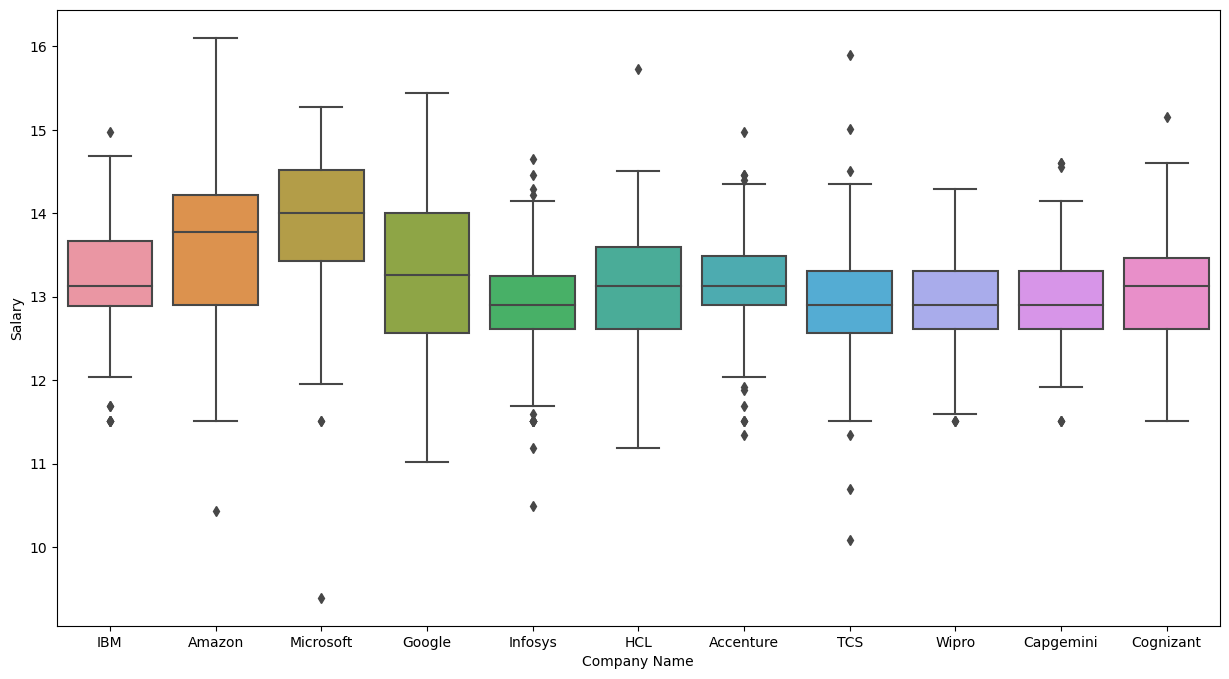

In [102]:
sns.boxplot(x='Company Name',y='Salary',data=DFi)
plt.title('Companies vs Salary')

Text(0.5, 1.0, 'Companies vs Rating')

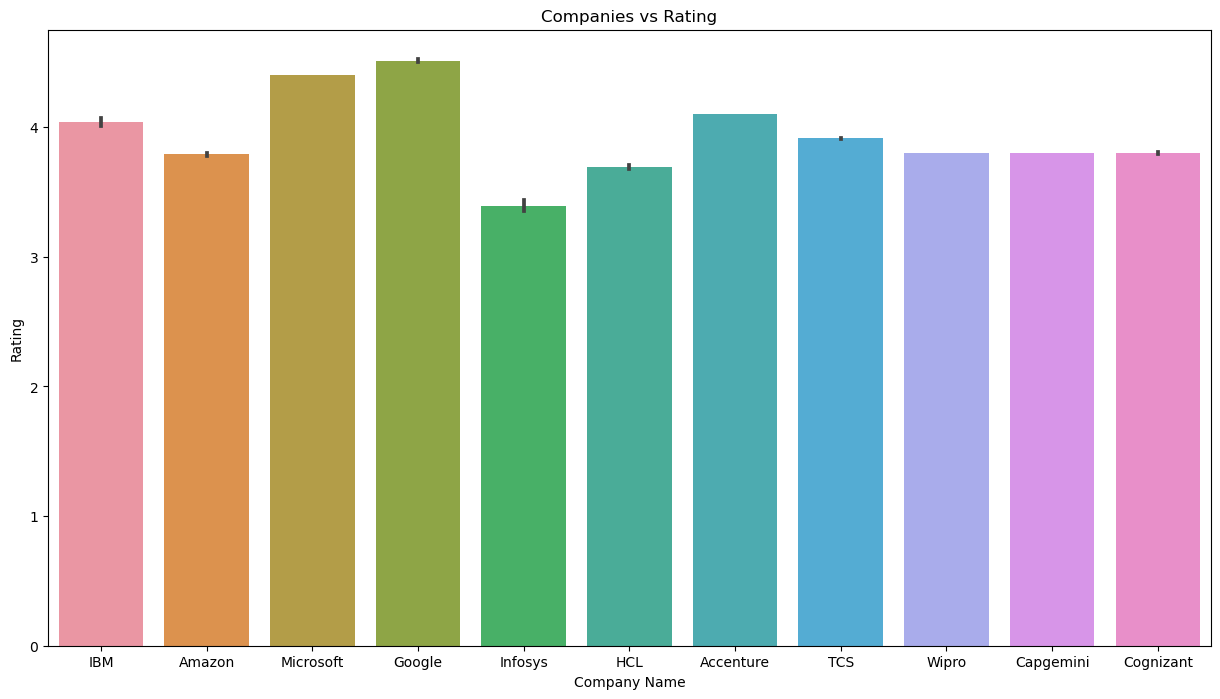

In [103]:
sns.barplot(x='Company Name',y='Rating',data=DFi)
plt.title('Companies vs Rating')


# Company-Wise Insights:
## 1.TCS has the highest number of employees, with a median salary of 4 LPA.
## 2.Developers at Microsoft receive the highest median salary of 12 LPA, followed by those at Amazon and Google, with median salaries of 9.6 LPA and 5.8 LPA, respectively.
## 3.Developers at TCS, Infosys, Wipro, and Capgemini have the lowest median salary of 4 LPA.
## 4.Employees of Microsoft and Google have higher ratings compared to other companies, while Infosys employees have the lowest rating.